In [90]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

path = "/home/maksim/ml/datasets/data_big.csv"

In [91]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


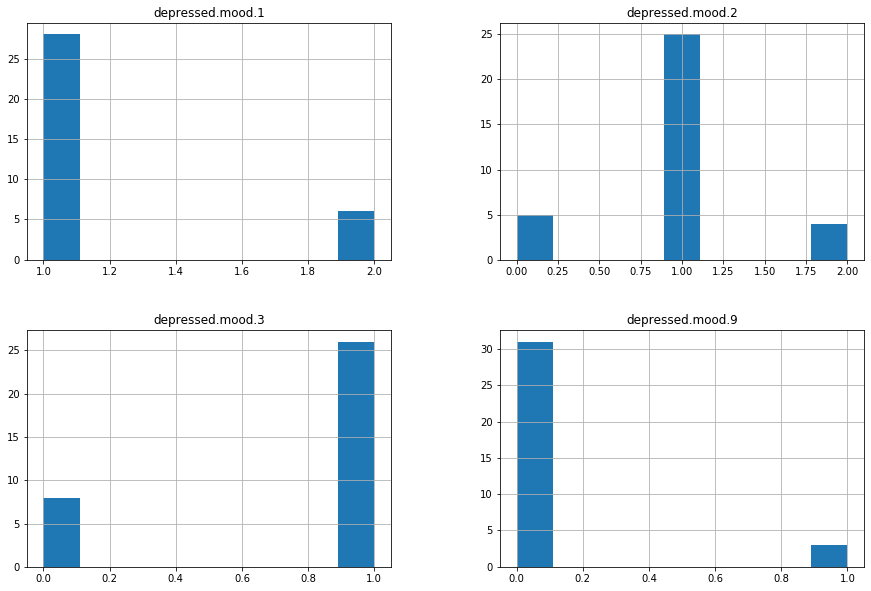

In [143]:
def feature_progress(feature):
    data = df.loc[:,[feature + ".1", feature  + ".2", feature  + ".3", feature  + ".9"]]
    data.fillna(data.median(), inplace=True)
    data.hist(bins=9, figsize=(15,10))
    plt.show()
feature_progress("depressed.mood")

In [155]:
#H0: All variances are equal.
#H1: At least one variance value is significantly larger than the other variance values.

L = 4
M = len(df.loc[:,"X.1":"X.2"].columns) - 2
feature = "depressed.mood"
df_depression = df.loc[:,[feature + ".1", feature  + ".2", feature  + ".3", feature  + ".9"]]
df_depression.fillna(df_depression.median(), inplace=True)
depression_measurements = [df_depression.loc[:,feature + "." + str(i)] for i in [1,2,3,9]]
depression_variance = [(len(x) -1)/len(x) * np.var(x) for x in depression_measurements]
cochrans_test = max(depression_variance)/np.sum(depression_variance)
g_table = 0.38
print(cochrans_test, "  ", g_table)
if cochrans_test < g_table: 
    print("Дсиперсии однородны, уровень значимости 0.05")
else:
     print("Дсиперсии не однородны, уровень значимости 0.05")


0.3940568475452196    0.38
Дсиперсии не однородны, уровень значимости 0.05
